<a href="https://colab.research.google.com/github/Lokeshgehlot0405/Image-Classification/blob/main/image_recognizer_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BACKEND PART / MODEL

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 4s 0us/step


(50000, 32, 32, 3)

In [3]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [4]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [5]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [6]:
# ann = models.Sequential([
#         layers.Flatten(input_shape=(32,32,3)),
#         layers.Dense(3000, activation='relu'),
#         layers.Dense(1000, activation='relu'),
#         layers.Dense(10, activation='softmax')    
#     ])

# ann.compile(optimizer='SGD',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# ann.fit(X_train, y_train, epochs=5)

In [7]:
# from sklearn.metrics import confusion_matrix , classification_report
# import numpy as np
# y_pred = ann.predict(X_test)
# y_pred_classes = [np.argmax(element) for element in y_pred]

# print("Classification Report: \n", classification_report(y_test, y_pred_classes))

In [8]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [9]:
cnn.compile(optimizer='adamax',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.6723 - accuracy: 0.4033
Epoch 2/10
1563/1563 [==============================] - 62s 40ms/step - loss: 1.3520 - accuracy: 0.5208
Epoch 3/10
1563/1563 [==============================] - 62s 40ms/step - loss: 1.2101 - accuracy: 0.5756
Epoch 4/10
1563/1563 [==============================] - 62s 39ms/step - loss: 1.1146 - accuracy: 0.6109
Epoch 5/10
1563/1563 [==============================] - 62s 39ms/step - loss: 1.0349 - accuracy: 0.6417
Epoch 6/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.9751 - accuracy: 0.6631
Epoch 7/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.9199 - accuracy: 0.6819
Epoch 8/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8758 - accuracy: 0.6957
Epoch 9/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8356 - accuracy: 0.7114
Epoch 10/10
1563/1563 [==============================] - 61s 39m

In [10]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.9102 - accuracy: 0.6887


[0.910194993019104, 0.6887000203132629]

In [11]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[8.1789857e-03, 3.2624154e-04, 1.8743528e-02, 9.0172511e-01,
        4.3426170e-03, 4.5145877e-02, 1.1527202e-02, 6.3253706e-04,
        9.0506012e-03, 3.2737444e-04],
       [6.3175246e-02, 5.9959543e-01, 5.5945950e-04, 2.1596929e-06,
        5.8544970e-06, 6.1708181e-07, 4.0920543e-08, 4.0476158e-07,
        3.3459017e-01, 2.0705422e-03],
       [6.2589228e-02, 1.8106927e-01, 3.6305450e-03, 9.3804678e-04,
        2.0256236e-03, 2.8471742e-04, 1.3379034e-04, 4.2548496e-04,
        6.9552642e-01, 5.3376909e-02],
       [6.3362634e-01, 1.6697595e-02, 8.6582657e-03, 4.7650584e-04,
        1.1960666e-02, 4.7548442e-06, 2.9382596e-05, 6.8612258e-06,
        3.2846251e-01, 7.7166638e-05],
       [9.2514478e-05, 6.1599462e-04, 2.8343381e-02, 1.5289640e-01,
        4.4004369e-01, 9.6983220e-03, 3.6635002e-01, 5.7965677e-05,
        1.8264255e-03, 7.5219759e-05]], dtype=float32)

In [12]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 1, 8, 0, 4]

In [13]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

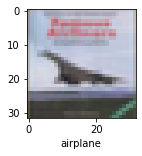

In [14]:
plot_sample(X_test, y_test,3)

In [15]:
classes[y_classes[3]]

'airplane'

In [16]:
cnn.save("image_classifier.h5")

# FRONTEND PART/ MODEL DEPLOYMENT

In [17]:
!pip install dash
!pip install jupyter_Dash
!pip install jupyter-dash pyngrok -q
!pip install dash-cytoscape==0.2.0


     |████████████████████████████████| 1.1 MB 7.2 MB/s 
     |████████████████████████████████| 3.7 MB 35.3 MB/s 
     |████████████████████████████████| 83 kB 2.4 MB/s 
     |████████████████████████████████| 1.8 MB 25.9 MB/s 
     |████████████████████████████████| 357 kB 54.1 MB/s 
  Created wheel for dash: filename=dash-1.21.0-py3-none-any.whl size=1100488 sha256=69e9d55e56423d44d4ae5ceb9151e9b99bc4b86239a87fced967c49d9feb9285
  Stored in directory: /root/.cache/pip/wheels/59/a4/f1/a7140afcad8dbaa3b1b12ef80843d29403d6ecca1c2f397948
  Created wheel for dash-core-components: filename=dash_core_components-1.17.1-py3-none-any.whl size=3738997 sha256=1997b6117d73dec52c9d433cca7025b092391a71d3c9f5ced176dae0499d5f38
  Stored in directory: /root/.cache/pip/wheels/ca/5b/fb/a135a7bf8e21223e4104aa5526a5173a20b64fe7fcd055b999
  Created wheel for dash-html-components: filename=dash_html_components-1.1.4-py3-none-any.whl size=319772 sha256=6de199d03f7501c131ced4e08cb2b500207fd7caedde2f72fec270a

In [18]:
from pyngrok import ngrok
tunnel = ngrok.connect(8050)

In [19]:
import datetime
from jupyter_dash import JupyterDash  # pip install dash
import dash_cytoscape as cyto  # pip install dash-cytoscape==0.2.0 or higher
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Output, Input
import pandas as pd  # pip install pandas
import plotly.express as px
import math
from dash import no_update
import dash
from dash.dependencies import Input, Output, State
import dash_core_components as dcc
import dash_html_components as html
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import PIL
from PIL import Image
import base64


external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = JupyterDash(__name__, external_stylesheets=external_stylesheets,server_url=tunnel.public_url)

app.layout = html.Div([
    html.H1("Image Recognizer" , style={"margin-top":'2%',"textAlign": "center",'color':'#800000'}),
    html.Br(),
    html.H4("Please Drag/Drop Or Select Image You Wish To Recognise",style={"textAlign": "center",'color':'black'}),
    html.Br(),
    dcc.Upload(
        id='upload-image',
        children=html.Div([
            'Drag and Drop or ',
            html.A('Select Files')
        ]),
        style={
            'width': '100%',
            'height': '75px',
   
            'lineHeight': '60px',
            'borderWidth': '1px',
            'borderStyle': 'dashed',
            'borderRadius': '5px',
            'textAlign': 'center',
        },
    ),
    
    html.Button('Recognize', id='recog', n_clicks=0,style={'margin-left': '42%',
    'margin-top': '2%',
    'height': '5rem',
    'width': '20rem',
    'color': 'white',
    'background': '#800000',
    'font-weight': 'bold',
     'cursor': 'grab',
    'font-size': '20px'}),
    html.Br(),
    html.Div(id='output-image-upload',style={'margin-top':"2%",'height':'300px'}),
    
])

def getpred(img):
    imgdata = base64.b64decode(img)
    imgf = Image.frombytes(mode='RGB',size=(32,32),data=imgdata)
    x = np.array(imgf)
    x = 2. * x / 255. - 1
    x = np.reshape(x, (1,32,32,3))
    classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
    prob=cnn.predict(x)
    y_class = [np.argmax(element) for element in prob]
    return str(classes[y_class[0]])

@app.callback(Output('output-image-upload', 'children'),
              Input('upload-image', 'contents'),
              Input('recog', 'n_clicks'),)
def parse_contents(img,n_clicks):
    if(n_clicks):
        ans=getpred(img)
        op="This is "+ ans
        return html.Div([
            html.Img(src=img,style={'margin-left':'33%','margin-top':'2%','height':"300px"}),
            html.H3(op,style={"width":'100%',"textAlign": "center",'color':'#800000','font-size': '30px','background':'#FFA500'}),
        ],style={'width':'100%'})


app.run_server(mode='external')

Dash app running on:


/usr/local/lib/python3.7/dist-packages/jupyter_dash/jupyter_app.py:128: UserWarning:

The server_url argument is ignored when running in Colab



<IPython.core.display.Javascript object>